## Text Mining – Tutorial

### NLTK

In [ ]:
! pip3 install nltk
! pip3 install numpy

import nltk

### Text

In [68]:
# !pip3 install pandas

import pandas as pd
data = pd.read_csv("simpsons_dataset.csv")
text = "".join(data["spoken_words"].astype(str).sample(1000)) # vybereme 1000 řádků, přetypujeme a spojíme
text[:100]

"Really? It's not that bad, is it?Stop it, Apu. You're scaring me.But I have to get back to Marge.TV'"

### Basic Operations

#### Counting

In [21]:
from collections import Counter
tokens = nltk.word_tokenize(text) # rozdělení na jednotlivá slova

# seřadí podle nejčastějších slov
def tokenCounts(tokens):
    counts = Counter(tokens) # čítač slov
    sortedCounts = sorted(counts.items(), key=lambda count:count[1], reverse=True)
    return sortedCounts

tokenCounts(tokens)[:10]

[(',', 614),
 ('.', 299),
 ('I', 291),
 ('!', 279),
 ('the', 239),
 ('a', 189),
 ('you', 187),
 ("'s", 183),
 ('?', 179),
 ('to', 153)]

#### Remove Punctuation

In [23]:
from string import punctuation
tokens = nltk.word_tokenize(text)

nopunc_tokens = [token for token in tokens if token not in punctuation] # odstranění interpunkce
tokenCounts(nopunc_tokens)[:10]

[('I', 291),
 ('the', 239),
 ('a', 189),
 ('you', 187),
 ("'s", 183),
 ('to', 153),
 ('...', 122),
 ('of', 113),
 ("n't", 96),
 ('that', 82)]

#### Stopwords

In [24]:
from nltk.corpus import stopwords
from string import punctuation
stops = stopwords.words('english')
tokens = nltk.word_tokenize(text)

filtered_tokens = [token for token in tokens if token not in punctuation]
filtered_tokens = [token for token in filtered_tokens if token.lower() not in stops]
tokenCounts(filtered_tokens)[:10]

[("'s", 183),
 ('...', 122),
 ("n't", 96),
 ('``', 54),
 ("'m", 52),
 ("'re", 46),
 ("'ll", 37),
 ('like', 28),
 ('know', 27),
 ('got', 27)]

### Text Processing techniques

#### Named Entity Recognition

In [35]:
tokens = nltk.word_tokenize(text)
tagged = nltk.pos_tag(tokens)

In [38]:
# Disambiguation of entity with entity types
ne_chunked = nltk.ne_chunk(tagged, binary=False) # získáme i kategorii
extractEntities(ne_chunked)

{'Springfield Elementary': 'ORGANIZATION',
 'West Springfield': 'LOCATION',
 'MOTHER': 'ORGANIZATION',
 'Club': 'PERSON',
 'POTATO': 'ORGANIZATION',
 'Homer': 'PERSON',
 'nanKrusty Versus': 'ORGANIZATION',
 'Riddler': 'ORGANIZATION',
 'Brokaw': 'PERSON',
 'Humphrey': 'GPE',
 'THE': 'ORGANIZATION',
 'CIRCLE': 'ORGANIZATION',
 'CIRCLE OF': 'ORGANIZATION',
 'Better': 'PERSON',
 'Bluella': 'PERSON',
 'Hello': 'PERSON',
 'Vampire': 'ORGANIZATION',
 'Marge': 'PERSON',
 'Mr. Burns': 'PERSON',
 'Dollface': 'GPE',
 'Abe': 'PERSON',
 'LEAVE': 'ORGANIZATION',
 'SEEING': 'ORGANIZATION',
 'Mom': 'PERSON',
 'Troy McClure': 'PERSON',
 'David': 'PERSON',
 'Super Goliath': 'PERSON',
 'Last Supper': 'PERSON',
 'Wiggum': 'PERSON',
 'Milhouse': 'PERSON',
 'Shame': 'PERSON',
 'Carl': 'PERSON',
 'Year Santa Got Lost': 'ORGANIZATION',
 'Jimmy Stewart': 'PERSON',
 'Mister Mailman.Well': 'PERSON',
 'Baruch': 'PERSON',
 'Okay': 'PERSON',
 'Ireland': 'GPE',
 'Winston Churchill': 'PERSON',
 'Carnage': 'GPE',
 'Bu

#### Sentiment Analysis

<Axes: ylabel='raw_character_text'>

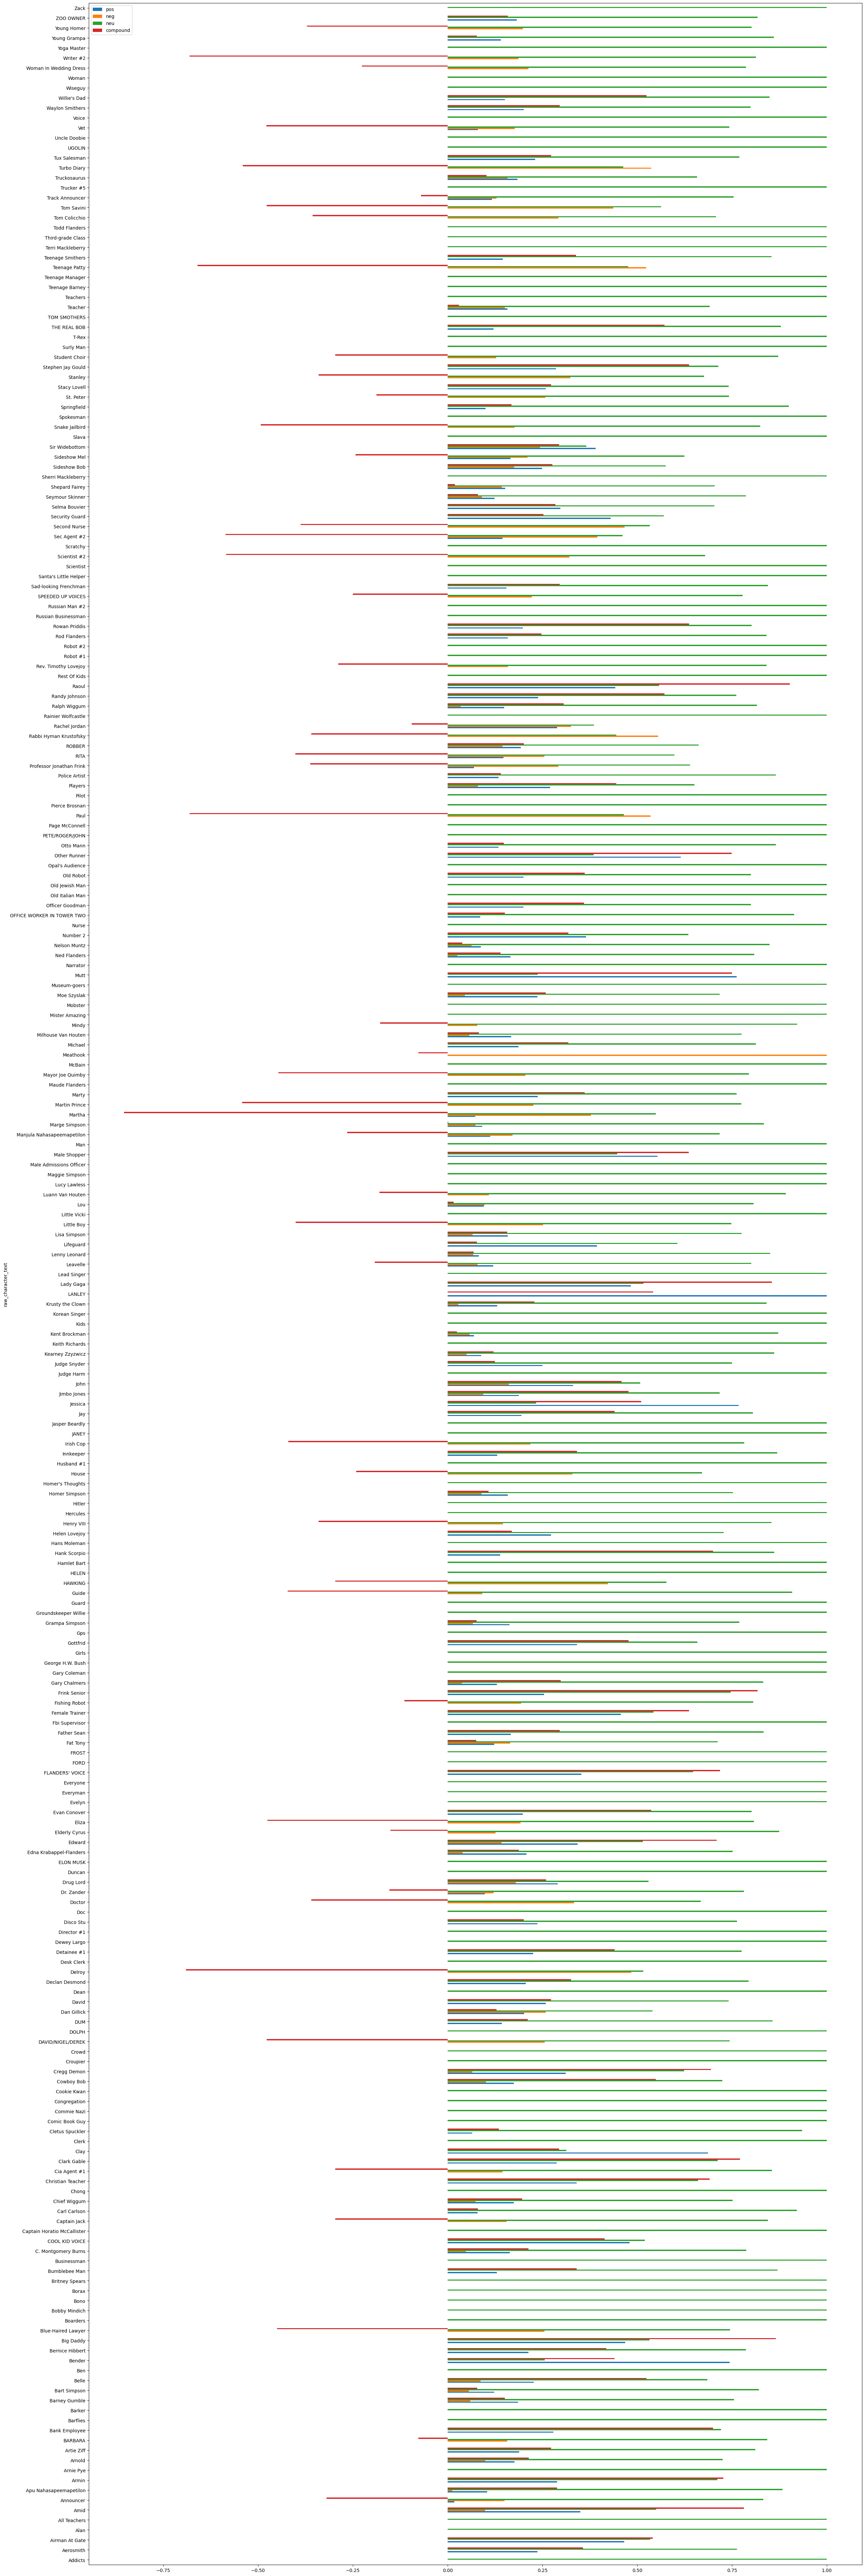

In [52]:
from nltk.sentiment.util import *
from nltk.sentiment import SentimentIntensityAnalyzer

vader_analyzer = SentimentIntensityAnalyzer()

def sentiment(row):
    sentiment = vader_analyzer.polarity_scores(str(row["spoken_words"]))
    row["pos"] = sentiment["pos"]
    row["neg"] = sentiment["neg"]
    row["neu"] = sentiment["neu"]
    row["compound"] = sentiment["compound"]
    return row

data_sentiments = data.sample(n=1000).apply(sentiment, axis=1)

# shluk podle sloupců
data_group = data_sentiments.groupby("raw_character_text")[["pos", "neg", "neu", "compound"]].mean()

# Vykreslí sentimenty jednotlivých charakterů
data_group.plot(figsize=(30,100), kind="barh")

In [58]:
# získá pojmenované entity, které sedí
def ne(row):
    tokens = nltk.word_tokenize(str(row["spoken_words"]))
    tagged = nltk.pos_tag(tokens)
    ne_chunked = nltk.ne_chunk(tagged, binary=False)
    row["ne"] = list(extractEntities(ne_chunked).keys())
    return row

data_sample = data[data["raw_character_text"] == "Homer Simpson"].sample(500).apply(ne, axis=1)
data_sample = data_sample.explode("ne") # rozbalíme řádku se seznamem na jednotlivé řádky
data_sample.groupby("ne").size().reset_index(name = "counts").sort_values("counts", ascending=False)

,ne,counts
102,Marge,34
16,Bart,14
76,Hey,8
153,Sorry,6
127,Okay,6
...,...,...
68,Grandpa Homer,1
69,Great,1
70,Grimes,1
71,Happy Days,1


### Word Embeddings - Word2Vec

In [ ]:
! pip install gensim # do-instalace

In [69]:
import gensim 
from gensim.models import Word2Vec 

sentences = nltk.sent_tokenize(text)
tokens = [nltk.word_tokenize(sent) for sent in sentences]

# Create CBOW model 
cbow_model = gensim.models.Word2Vec(tokens, min_count = 5, vector_size = 100, window = 5, workers=10)
  
# Create Skip Gram model 
sg_model = gensim.models.Word2Vec(tokens, min_count = 5, vector_size = 100, window = 5, sg = 1, workers=10) 

In [ ]:
cbow_model.wv['nice'] # takto vypadá vektor pro slovo "nice"

In [70]:
cbow_model.wv.most_similar("Bart", topn=3)

[('that', 0.9983601570129395),
 ('for', 0.9983406066894531),
 ("'s", 0.9983320236206055)]

In [71]:
sg_model.wv.most_similar("Bart", topn=3)

[('again', 0.9984219670295715),
 ('for', 0.9983180165290833),
 ('six', 0.9981979131698608)]

### Word Embeddings - FastText

In [72]:
import gensim 
from gensim.models import FastText

# vytvoří si slovník a pracuje s ním
fasttext_model = FastText(vector_size=100, window=20, min_count=5)
fasttext_model.build_vocab(corpus_iterable=tokens)
fasttext_model.train(corpus_iterable=tokens, total_examples=len(tokens), epochs=10)  # train

(35334, 101260)

In [73]:
print(fasttext_model.wv.most_similar("Bart", topn=3))
# Podobná slova tady vypadají takto, protože kořen je "nic"
# dá se tedy přirovnat, jako by to bylo rýmování v básni

[('this', 0.9999403357505798), ('Springfield', 0.9999377131462097), ('Homer', 0.9999364018440247)]
